# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this problem, Gaussian Mixture Model for classification of double moon dataset is considered.

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
from sklearn import mixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
import numpy as np
import itertools
import random
import copy 
import math
import os
plt.style.use('ggplot')

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [2]:
def sample_ring(center,r1,r2,n_points):
    nd = center.size
    x = np.random.normal(size=(n_points, nd))
    sq = np.sum(x**2,axis=1)
    z = (r2-r1)/r2
    fr = (r2-r1)*gammainc(nd/2**z,sq/2**z)**(1/nd)/np.sqrt(sq) + r1/np.sqrt(sq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,nd))
    p = center + np.multiply(x,frtiled)
    return p

In [3]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]  
XN = dg.values
XP = df.values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
X = data[:,0:2]

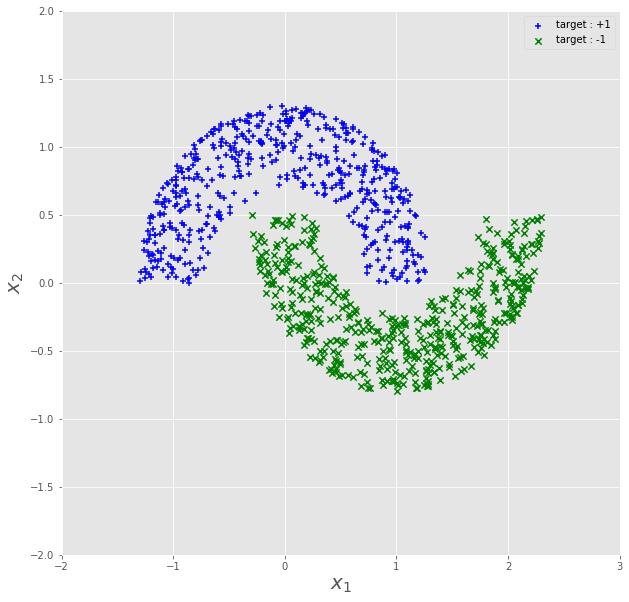

In [4]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.xlim(-2,3)
plt.ylim(-2,2)
plt.legend()
plt.show()

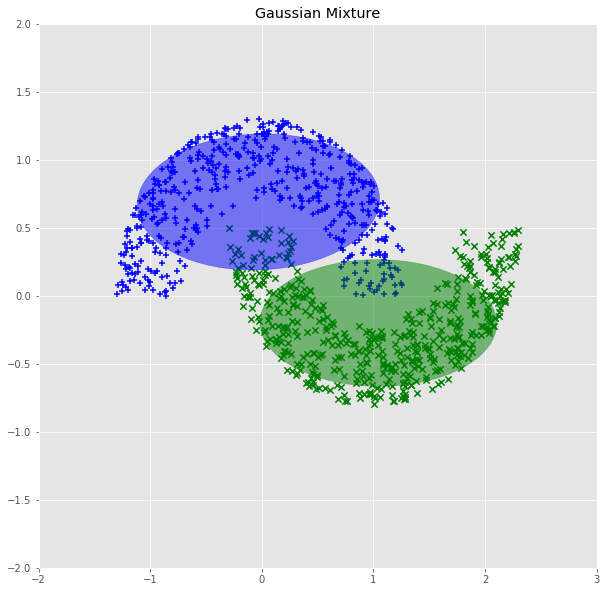

In [5]:
color_iter = itertools.cycle(['b'])
gmm = mixture.GaussianMixture(n_components=1, covariance_type='full').fit(XP)    #Training with one component
gmm1 = mixture.GaussianMixture(n_components=1, covariance_type='full').fit(XN)   #Training with one component
#plot_results(XP, gmm.predict(XP), gmm.means_, gmm.covariances_, 0,
#             'Gaussian Mixture')
plt.figure(figsize=(10,10))
splot = plt.subplot(1, 1, 1)
for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm.predict(XP) == i):
            continue
        ax = plt.scatter(XP[gmm.predict(XP)== i, 0], XP[gmm.predict(XP)== i, 1], marker='+', c='b',label = "target : +1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
color_iter = itertools.cycle(['g'])
for i, (mean, covar, color) in enumerate(zip(gmm1.means_, gmm1.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm1.predict(XP) == i):
            continue
        ax = plt.scatter(XN[gmm1.predict(XN)== i, 0], XN[gmm1.predict(XN)== i, 1],marker='x', c='g',label = "target : -1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        
plt.xlim(-2., 3.)
plt.ylim(-2., 2.)
plt.xticks()
plt.yticks()
plt.title('Gaussian Mixture')

plt.show()

### <span style='font-family:"Times New Roman"'>Drawing samples from generated gaussian mixture models 

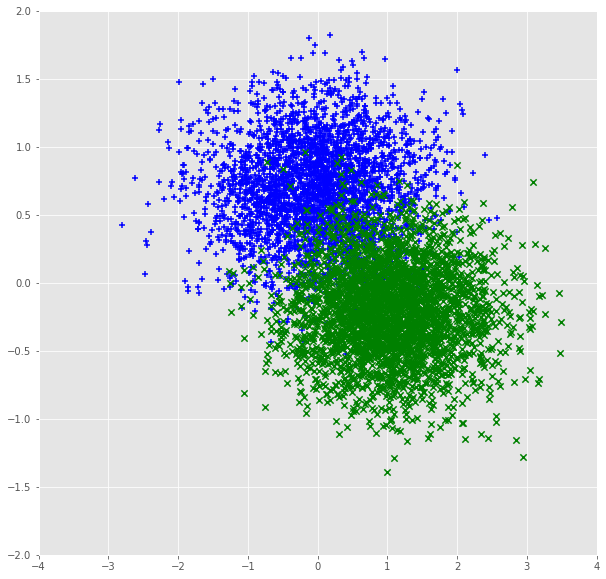

In [6]:
Xnew, Ynew = gmm.sample(3000)  # if Ynew is valuable
Xnew1, Ynew1 = gmm1.sample(3000)  # if Ynew is valuable
plt.figure(figsize=(10,10))
plt.scatter(Xnew[:, 0], Xnew[:, 1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(Xnew1[:, 0], Xnew1[:, 1],marker='x', c='g',label = "target : -1", s=40)
plt.xlim(-4,4)
plt.ylim(-2,2)
plt.show()

In [7]:
XN = []
XP = []
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]  
XN = dg.values
XP = df.values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
X = data[:,0:2]

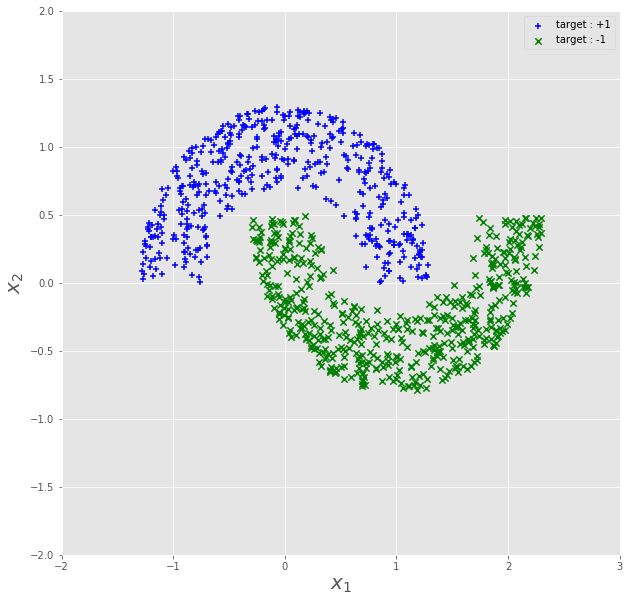

In [8]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.xlim(-2,3)
plt.ylim(-2,2)
plt.legend()
plt.show()

In [9]:
if len(XP)<= len(XN):
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    logProb = []
    XN = XN[0:len(XP),:]
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    Number = probXP[probXP>=probXN]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XP))
else:
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    logProb = []
    XP = XP[0:len(XN),:]
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    Number = probXP[probXN>=probXP]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XN))

Accuracy of Associated Likelihood:
0.9137577002053389


In [10]:
XN = []
XP = []
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]  
XN = dg.values
XP = df.values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
X = data[:,0:2]

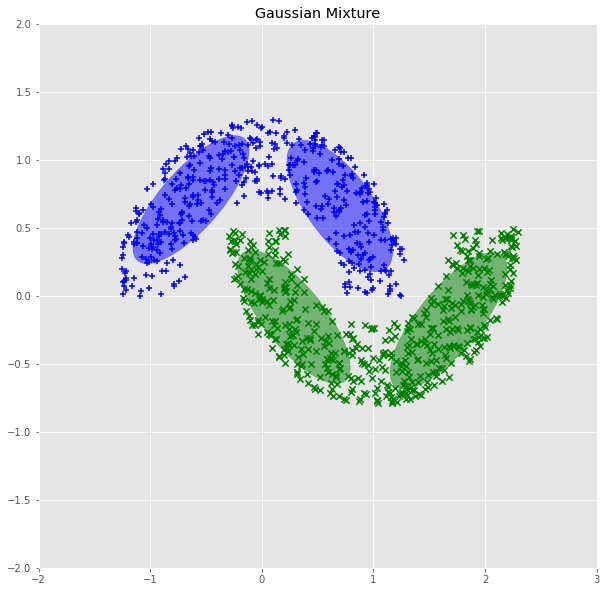

In [11]:
color_iter = itertools.cycle(['b'])
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(XP)       #Training with two components
gmm1 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(XN)      #Training with two components
#plot_results(XP, gmm.predict(XP), gmm.means_, gmm.covariances_, 0,
#             'Gaussian Mixture')
plt.figure(figsize=(10,10))
splot = plt.subplot(1, 1, 1)
for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm.predict(XP) == i):
            continue
        ax = plt.scatter(XP[gmm.predict(XP)== i, 0], XP[gmm.predict(XP)== i, 1], marker='+', c='b',label = "target : +1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
color_iter = itertools.cycle(['g'])
for i, (mean, covar, color) in enumerate(zip(gmm1.means_, gmm1.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm1.predict(XP) == i):
            continue
        ax = plt.scatter(XN[gmm1.predict(XN)== i, 0], XN[gmm1.predict(XN)== i, 1],marker='x', c='g',label = "target : -1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        
plt.xlim(-2., 3.)
plt.ylim(-2., 2.)
plt.xticks()
plt.yticks()
plt.title('Gaussian Mixture')
plt.show()

### <span style='font-family:"Times New Roman"'>Drawing samples from generated gaussian mixture models 

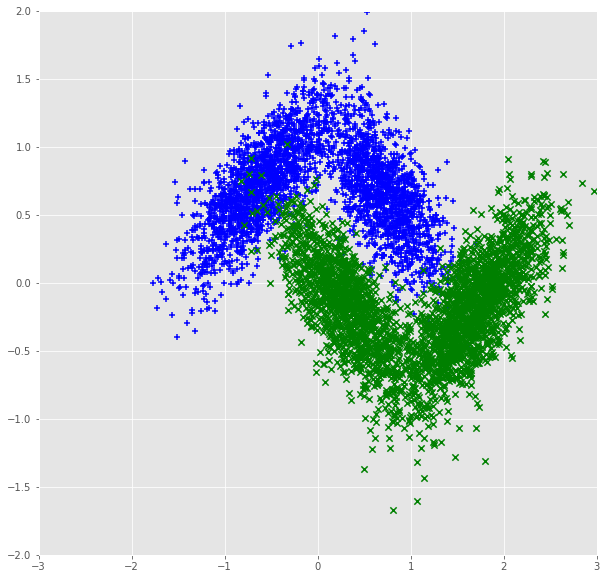

In [12]:
Xnew, Ynew = gmm.sample(3000)  # if Ynew is valuable
Xnew1, Ynew1 = gmm1.sample(3000)  # if Ynew is valuable
plt.figure(figsize=(10,10))
plt.scatter(Xnew[:, 0], Xnew[:, 1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(Xnew1[:, 0], Xnew1[:, 1],marker='x', c='g',label = "target : -1", s=40)
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.show()

In [13]:
XN = []
XP = []
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]  
XN = dg.values
XP = df.values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
X = data[:,0:2]

In [14]:
if len(XP)<= len(XN):
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    logProb = []
    XN = XN[0:len(XP),:]
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    Number = probXP[probXP>=probXN]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XP))
else:
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    logProb = []
    XP = XP[0:len(XN),:]
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    Number = probXP[probXN>=probXP]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XN))

Accuracy of Associated Likelihood:
1.0


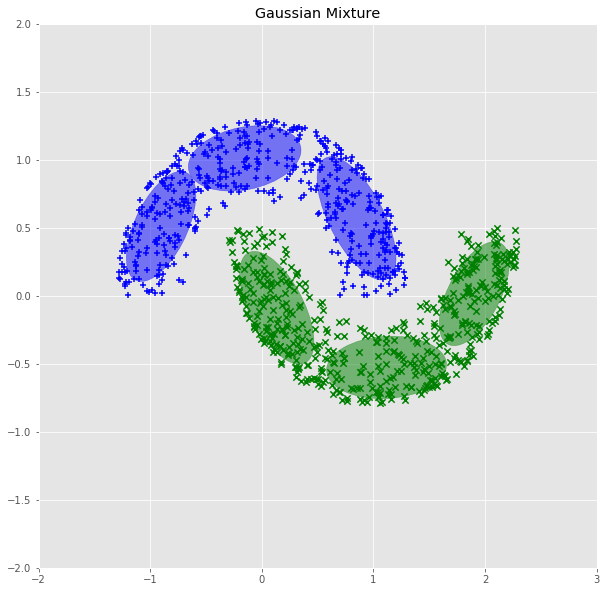

In [15]:
color_iter = itertools.cycle(['b'])
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(XP)     #Training with three components
gmm1 = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(XN)    #Training with three components
#plot_results(XP, gmm.predict(XP), gmm.means_, gmm.covariances_, 0,
#             'Gaussian Mixture')
plt.figure(figsize=(10,10))
splot = plt.subplot(1, 1, 1)
for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm.predict(XP) == i):
            continue
        ax = plt.scatter(XP[gmm.predict(XP)== i, 0], XP[gmm.predict(XP)== i, 1], marker='+', c='b',label = "target : +1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
color_iter = itertools.cycle(['g'])
for i, (mean, covar, color) in enumerate(zip(gmm1.means_, gmm1.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm1.predict(XP) == i):
            continue
        ax = plt.scatter(XN[gmm1.predict(XN)== i, 0], XN[gmm1.predict(XN)== i, 1],marker='x', c='g',label = "target : -1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        
plt.xlim(-2., 3.)
plt.ylim(-2., 2.)
plt.xticks()
plt.yticks()
plt.title('Gaussian Mixture')
plt.show()

### <span style='font-family:"Times New Roman"'>Drawing samples from generated gaussian mixture models 

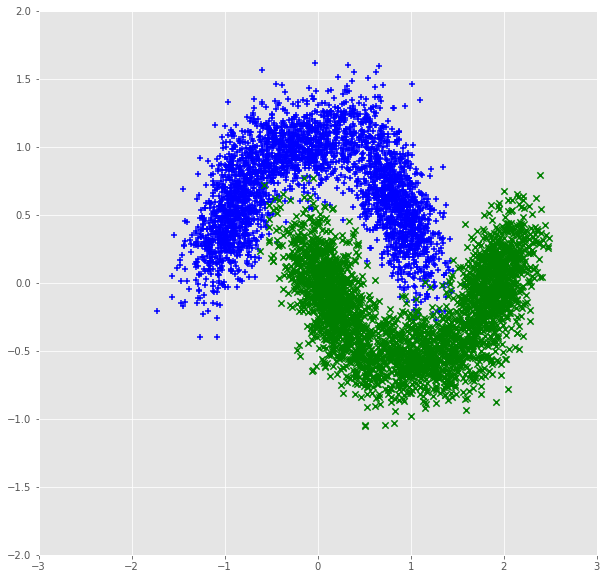

In [16]:
Xnew, Ynew = gmm.sample(3000)  # if Ynew is valuable
Xnew1, Ynew1 = gmm1.sample(3000)  # if Ynew is valuable
plt.figure(figsize=(10,10))
plt.scatter(Xnew[:, 0], Xnew[:, 1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(Xnew1[:, 0], Xnew1[:, 1],marker='x', c='g',label = "target : -1", s=40)
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.show()

In [25]:
XN = []
XP = []
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
df = pd.DataFrame(p)  # transposed for easier plotting
df = df[(df[1]) >= 0]  
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,1000)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]  
XN = dg.values
XP = df.values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
X = data[:,0:2]

In [26]:
if len(XP)<= len(XN):
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    logProb = []
    XN = XN[0:len(XP),:]
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    Number = probXP[probXP>=probXN]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XP))
else:
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    logProb = []
    XP = XP[0:len(XN),:]
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    Number = probXP[probXN>=probXP]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XN))

Accuracy of Associated Likelihood:
1.0


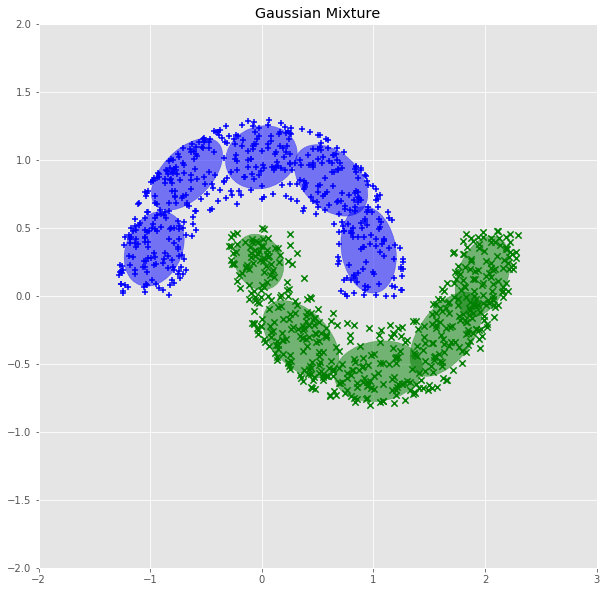

In [27]:
color_iter = itertools.cycle(['b'])
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(XP)      #Training with five components
gmm1 = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(XN)     #Training with five components
#plot_results(XP, gmm.predict(XP), gmm.means_, gmm.covariances_, 0,
#             'Gaussian Mixture')
plt.figure(figsize=(10,10))
splot = plt.subplot(1, 1, 1)
for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm.predict(XP) == i):
            continue
        ax = plt.scatter(XP[gmm.predict(XP)== i, 0], XP[gmm.predict(XP)== i, 1], marker='+', c='b',label = "target : +1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
color_iter = itertools.cycle(['g'])
for i, (mean, covar, color) in enumerate(zip(gmm1.means_, gmm1.covariances_, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(gmm1.predict(XP) == i):
            continue
        ax = plt.scatter(XN[gmm1.predict(XN)== i, 0], XN[gmm1.predict(XN)== i, 1],marker='x', c='g',label = "target : -1", s=40)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        
plt.xlim(-2., 3.)
plt.ylim(-2., 2.)
plt.xticks()
plt.yticks()
plt.title('Gaussian Mixture')
plt.show()

### <span style='font-family:"Times New Roman"'>Drawing samples from generated gaussian mixture models 

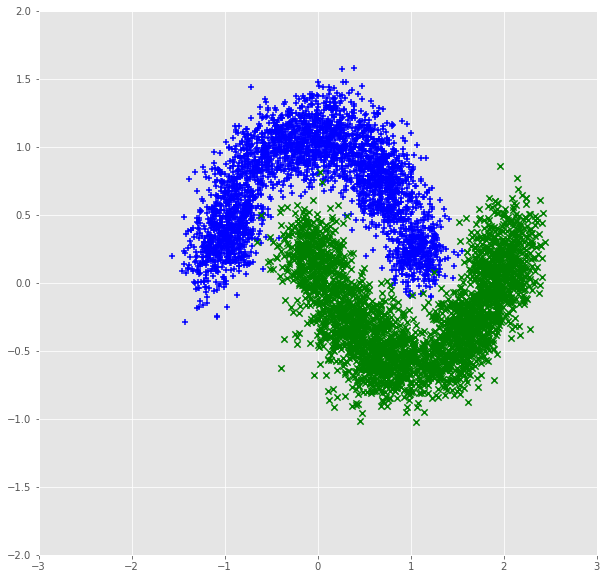

In [20]:
Xnew, Ynew = gmm.sample(3000)  # if Ynew is valuable
Xnew1, Ynew1 = gmm1.sample(3000)  # if Ynew is valuable
plt.figure(figsize=(10,10))
plt.scatter(Xnew[:, 0], Xnew[:, 1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(Xnew1[:, 0], Xnew1[:, 1],marker='x', c='g',label = "target : -1", s=40)
plt.xlim(-3,3)
plt.ylim(-2,2)
plt.show()

In [28]:
if len(XP)<= len(XN):
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    logProb = []
    XN = XN[0:len(XP),:]
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    Number = probXP[probXP>=probXN]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XP))
else:
    logProb = gmm.score_samples(XN)
    probXN = np.exp( logProb )
    logProb = []
    XP = XP[0:len(XN),:]
    logProb = gmm.score_samples(XP)
    probXP = np.exp( logProb )
    Number = probXP[probXN>=probXP]
    print('Accuracy of Associated Likelihood:')
    print(len(Number)/len(XN))

Accuracy of Associated Likelihood:
1.0
